In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

Idea is to model a spiral such that the curve-radius $R$ increases linearly with the arc length $s$

$$R(s) = R_0 + \frac{\partial R}{\partial s} \cdot s = R_0 + A \cdot s$$

which approximatly happens in the limit of constant energy loss per travel distance.

To achive that we construct a unit tangential vector $\vec{t}(s)$ such that makes the right curvature $$\kappa = |\vec{t}'(s)|$$

Ansatz
$$\vec{t} = \binom{\cos \varphi(s)}{ \sin \varphi(s)}$$
such that
$$\kappa = \varphi'(s) = \frac{1}{R(s)}$$

which is solved by
$$ \varphi(s) = \frac{\log R(s) - \log R_0} {A}$$
where the integration constant was choosen suitably to achive $f(0) = 0$.


Using the unit tangential vector we can integrate the position like

$$\vec{x}(S) = \int_0^S \vec{t}(s) \partial s$$

which is analytically solvable

$$\vec{x}(s) = \frac{R(s)}{A^2 + 1} \cdot (A \cdot \vec{t}(s) + \vec{n}(s)) + \vec{c}$$

where $\vec{c}$ can suitably be choosen to achieve $\vec{x}(0) = 0$

For a small energy loss we can simplify to
$$\vec{x}(s) = R(s) \cdot \vec{n}(s) + \vec{c}$$

where $\vec{c}$ is the center of the spiral.

In [27]:
def Vec2D(x, y):
    return np.array((x,y))

def perp2D(vec2D):
    return Vec2D(-vec2D[1], vec2D[0])

In [57]:
class Spiral:
    def __init__(self, R, dRds):
        self.R = R
        self.dRds = dRds
        
    def phi(self, s):
        return np.log( (self.R + self.dRds * s) / self.R) / self.dRds
        
    def loop_s(self, n):
        phi = 2 * n * np.pi
        s = self.R * (np.exp(phi * self.dRds) - 1) / self.dRds
        return s
    
    def pos2D(self, s):
        tan2D = self.tangential2D(s)
        x = (self.dRds * s + self.R) * (self.dRds * tan2D[0] + tan2D[1]) / (self.dRds ** 2 + 1)
        y = (self.dRds * s + self.R) * (self.dRds * tan2D[1] - tan2D[0]) / (self.dRds ** 2 + 1)
        
        x0 = self.R * self.dRds / (self.dRds ** 2 + 1)
        y0 = -self.R / (self.dRds ** 2 + 1)
        
        return Vec2D(x - x0, y - y0)
    
    def tangential2D(self, s):
        phi = self.phi(s)
        tx = np.cos(phi)
        ty = np.sin(phi)
        return Vec2D(tx, ty)
    
    def curvature(self, s):
        return 1.0 / (self.R + self.dRds * s) 
    
    def radius(self, s):
        return self.R + self.dRds * s
    
    def center2D(self, s):
        return perp2D(self.tangential2D(s)) * self.radius(s)

In [112]:
R = 100
dRds = -0.01 * R / R / np.pi 
norm_spiral = Spiral(R, dRds)
norm_circle = Spiral(R, R * 10**-8)

In [113]:
half_loop_s = norm_spiral.loop_s(100)
s = np.linspace(0, half_loop_s, 1000)
half_loop_s, R * np.pi

(27164.24322002157, 314.1592653589793)

In [114]:
spiral2Ds = norm_spiral.pos2D(s)
circle2Ds = norm_circle.pos2D(s)
tan2Ds = norm_spiral.tangential2D(s)
center2D = norm_spiral.center2D(0)

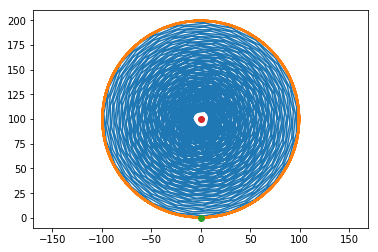

In [116]:
plt.plot(spiral2Ds[0,:], spiral2Ds[1,:])
plt.plot(circle2Ds[0,:], circle2Ds[1,:])
plt.plot(*norm_spiral.pos2D(0), 'o')
plt.plot(*norm_spiral.center2D(0), 'o')
plt.axis('equal')
pass

In [117]:
norm_spiral.tangential2D(0)

array([ 1., -0.])

In [118]:
disp2D = spiral2Ds - center2D[:,np.newaxis]

In [119]:
disp = R - np.sqrt(np.sum(disp2D**2, axis=0))

In [120]:
s_circle = norm_spiral.phi(s) * R

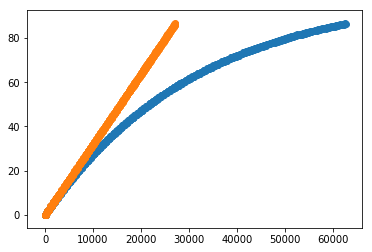

In [121]:
plt.scatter(s_circle, disp)
plt.scatter(s, disp)

/home/ofrost/Projects/basf2/externals/v01-04-01/Linux_x86_64/common/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


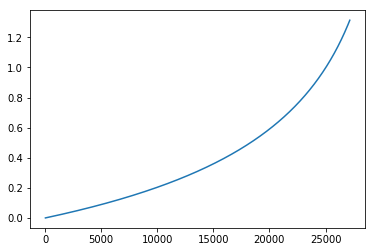

In [122]:
plt.plot(s, (s_circle - s) / s)
#plt.plot((0, np.pi),(0, np.pi))

In [93]:
DR = -norm_spiral.dRds * s_circle

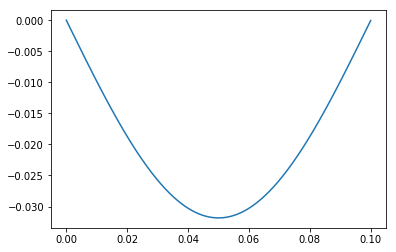

In [107]:
plt.plot(DR, disp - DR)
# plt.plot((0, max(-disp)),(0, max(-disp)))

In [103]:
DR

array([-0.        ,  0.00010005,  0.0002001 ,  0.00030015,  0.0004002 ,
        0.00050025,  0.0006003 ,  0.00070035,  0.0008004 ,  0.00090045,
        0.00100051,  0.00110056,  0.00120061,  0.00130066,  0.00140071,
        0.00150076,  0.00160081,  0.00170087,  0.00180092,  0.00190097,
        0.00200102,  0.00210107,  0.00220113,  0.00230118,  0.00240123,
        0.00250128,  0.00260134,  0.00270139,  0.00280144,  0.00290149,
        0.00300155,  0.0031016 ,  0.00320165,  0.00330171,  0.00340176,
        0.00350181,  0.00360187,  0.00370192,  0.00380197,  0.00390203,
        0.00400208,  0.00410214,  0.00420219,  0.00430225,  0.0044023 ,
        0.00450235,  0.00460241,  0.00470246,  0.00480252,  0.00490257,
        0.00500263,  0.00510268,  0.00520274,  0.00530279,  0.00540285,
        0.00550291,  0.00560296,  0.00570302,  0.00580307,  0.00590313,
        0.00600318,  0.00610324,  0.0062033 ,  0.00630335,  0.00640341,
        0.00650347,  0.00660352,  0.00670358,  0.00680364,  0.00

In [42]:
R * 0.01

1.0

In [43]:
dRds * np.pi * R

-1.0